PROJECT - 6: CRIME DATA ANALYSIS

In [1]:
#While working on EDA (Exploratory Data Analysis) projects, we typically follow certain steps. 
#The initial step involves collecting the data.
#Then the task goes on
#Step-1 : Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step-2: Loading the data
data = pd.read_csv(r"C:\Users\aniketh\Downloads\archive5\crime_data.csv")

In [5]:
# Step-3: Display basic information and initial rows
print(data.head())
print(data.tail())
print(data.info())
print(data.describe(include='all'))
print(data.shape)

    Date Rptd    DATE OCC TIME OCC  AREA  AREA NAME  Part 1-2  Crm Cd  \
0  2022-04-12  2020-10-01    00:01    19    Mission         1     821   
1  2023-01-05  2020-02-01    08:00     2    Rampart         2     812   
2  2023-03-21  2020-03-15    12:00    19    Mission         2     812   
3  2023-06-04  2020-07-01    12:00    20    Olympic         2     812   
4  2022-02-02  2020-02-09    12:00    11  Northeast         2     930   

                                         Crm Cd Desc  Vict Age Vict Sex  \
0  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...         8        F   
1  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...         7        F   
2  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...        12        F   
3  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...         7        F   
4             CRIMINAL THREATS - NO WEAPON DISPLAYED        30        F   

  Vict Descent                                   Premis Desc  \
0            H                        SINGLE F

In [6]:
# Check for missing values 
print("Missing values in Data:")
print(data.isnull().sum())

Missing values in Data:
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Desc     0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64


In [7]:
#We have no missing values

In [8]:
#Check for duplicates
print("Duplicates in Data:")
print(data.duplicated().sum())

Duplicates in Data:
1211


In [9]:
#We must drop all the duplicates
dup=data.drop_duplicates(inplace=True)
print(dup)

None


In [10]:
print(data.duplicated().sum())

0


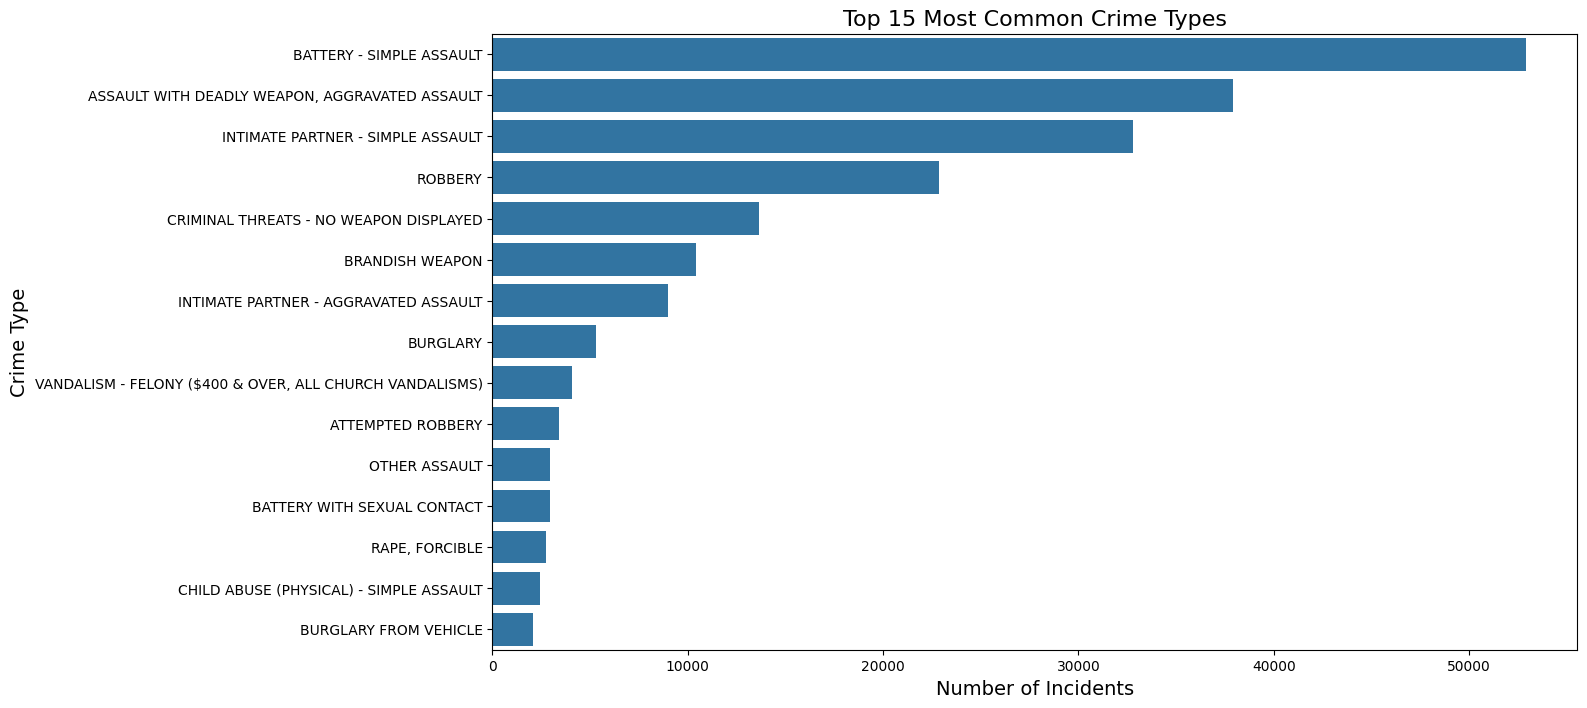

In [17]:
# Count of each crime type
top_n = 15
top_crimes = data['Crm Cd Desc'].value_counts().nlargest(top_n)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_crimes.values, y=top_crimes.index)
plt.title(f'Top {top_n} Most Common Crime Types', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Crime Type', fontsize=14)
plt.show()

<Axes: xlabel='Vict Age', ylabel='Weapon Desc'>

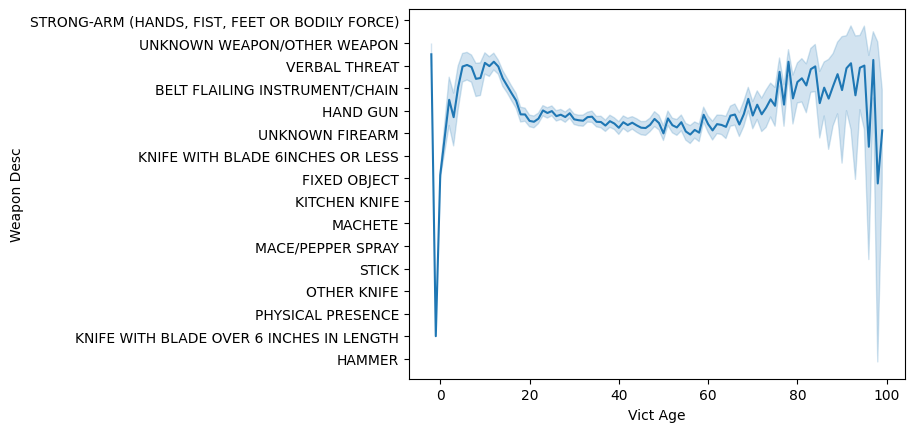

In [32]:
# draw lineplot 
sns.lineplot(x="Vict Age", y="Weapon Desc", data=data)

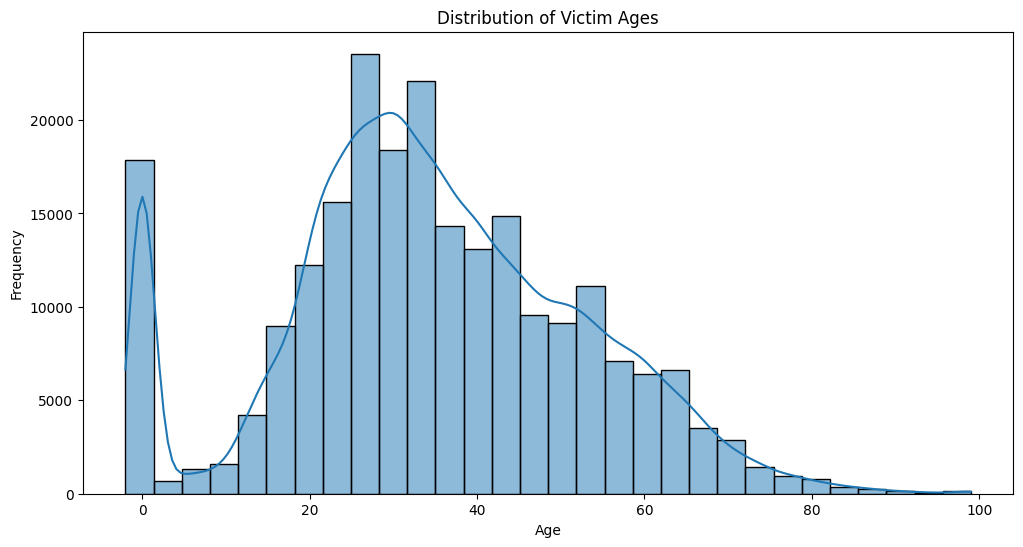

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Vict Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Victim Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


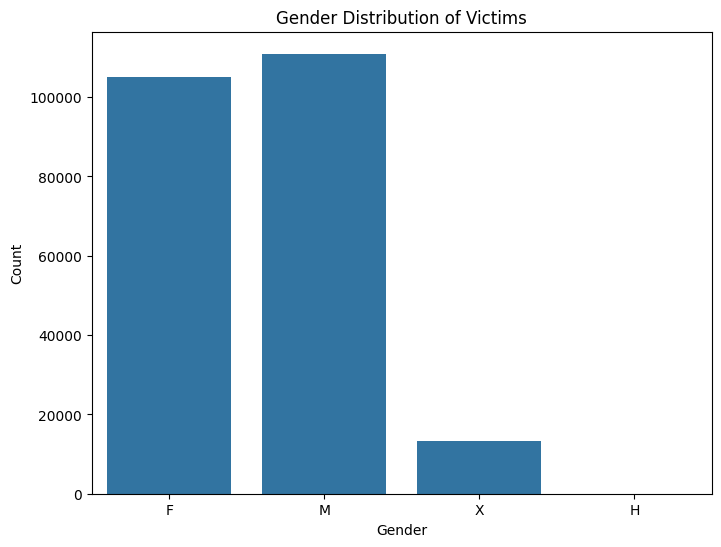

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Vict Sex', data=data)
plt.title('Gender Distribution of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

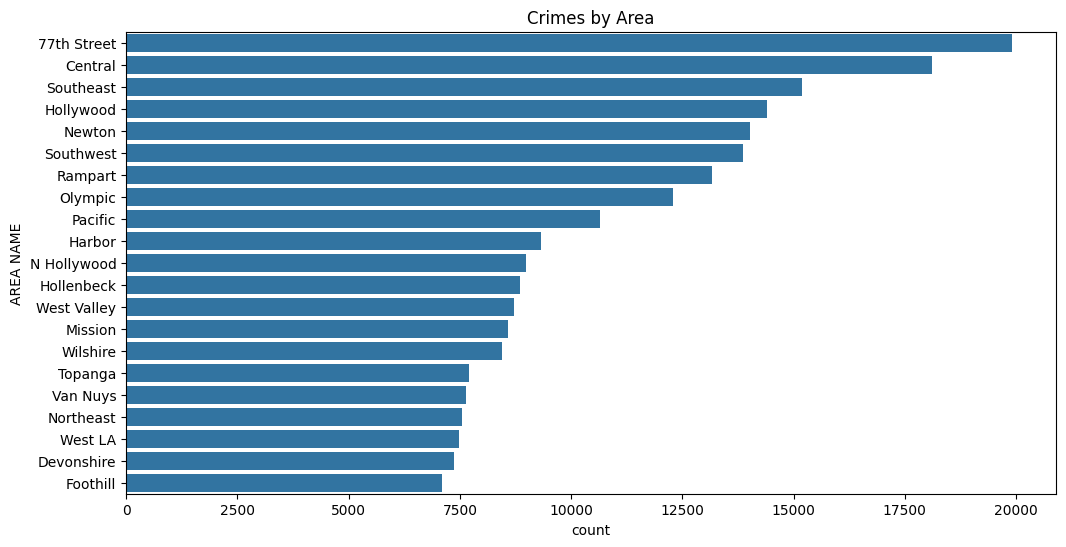

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='AREA NAME', data=data, order=data['AREA NAME'].value_counts().index)
plt.title('Crimes by Area')
plt.show()


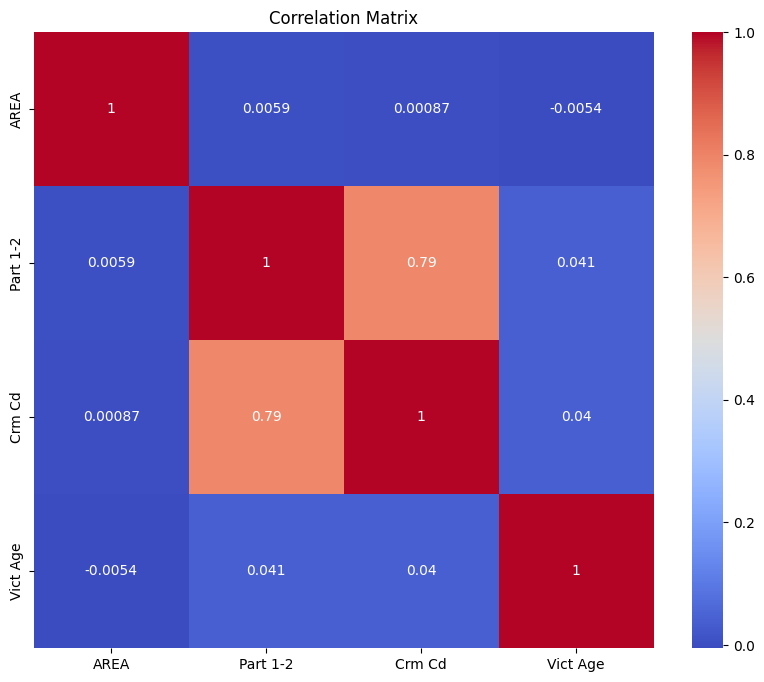

In [22]:
# Select numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


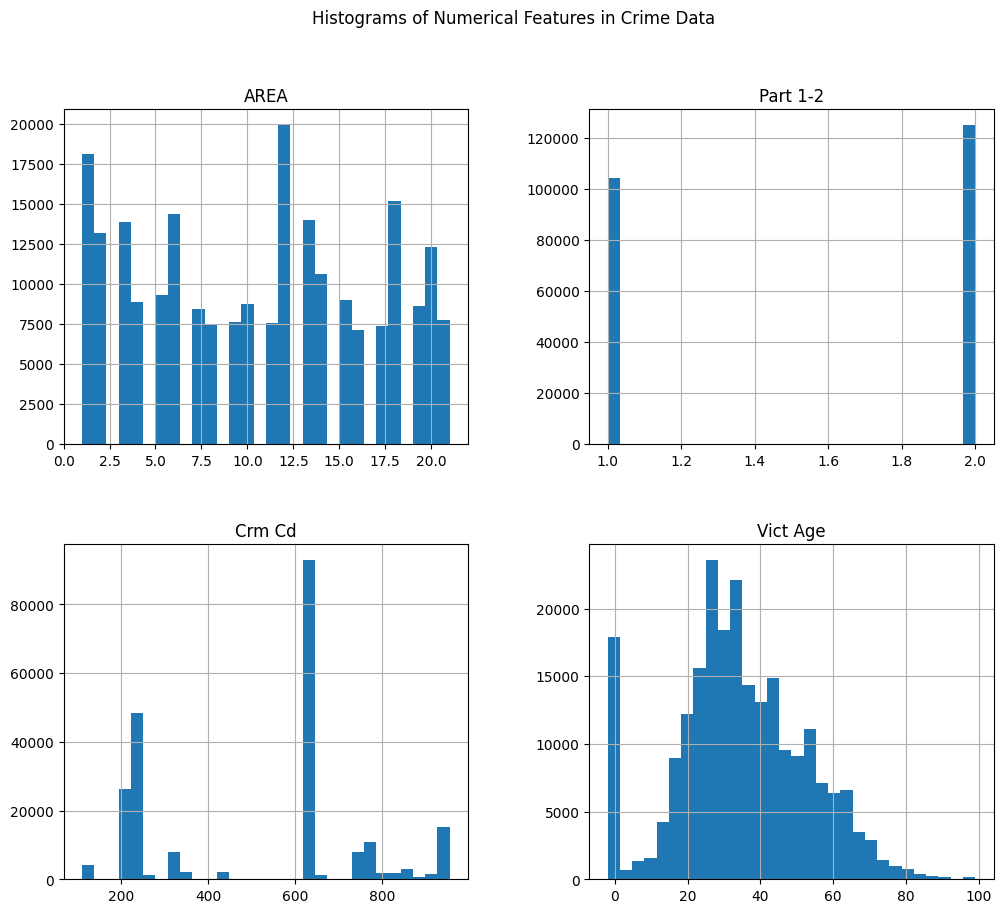

In [29]:
data.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features in Crime Data')
plt.show()


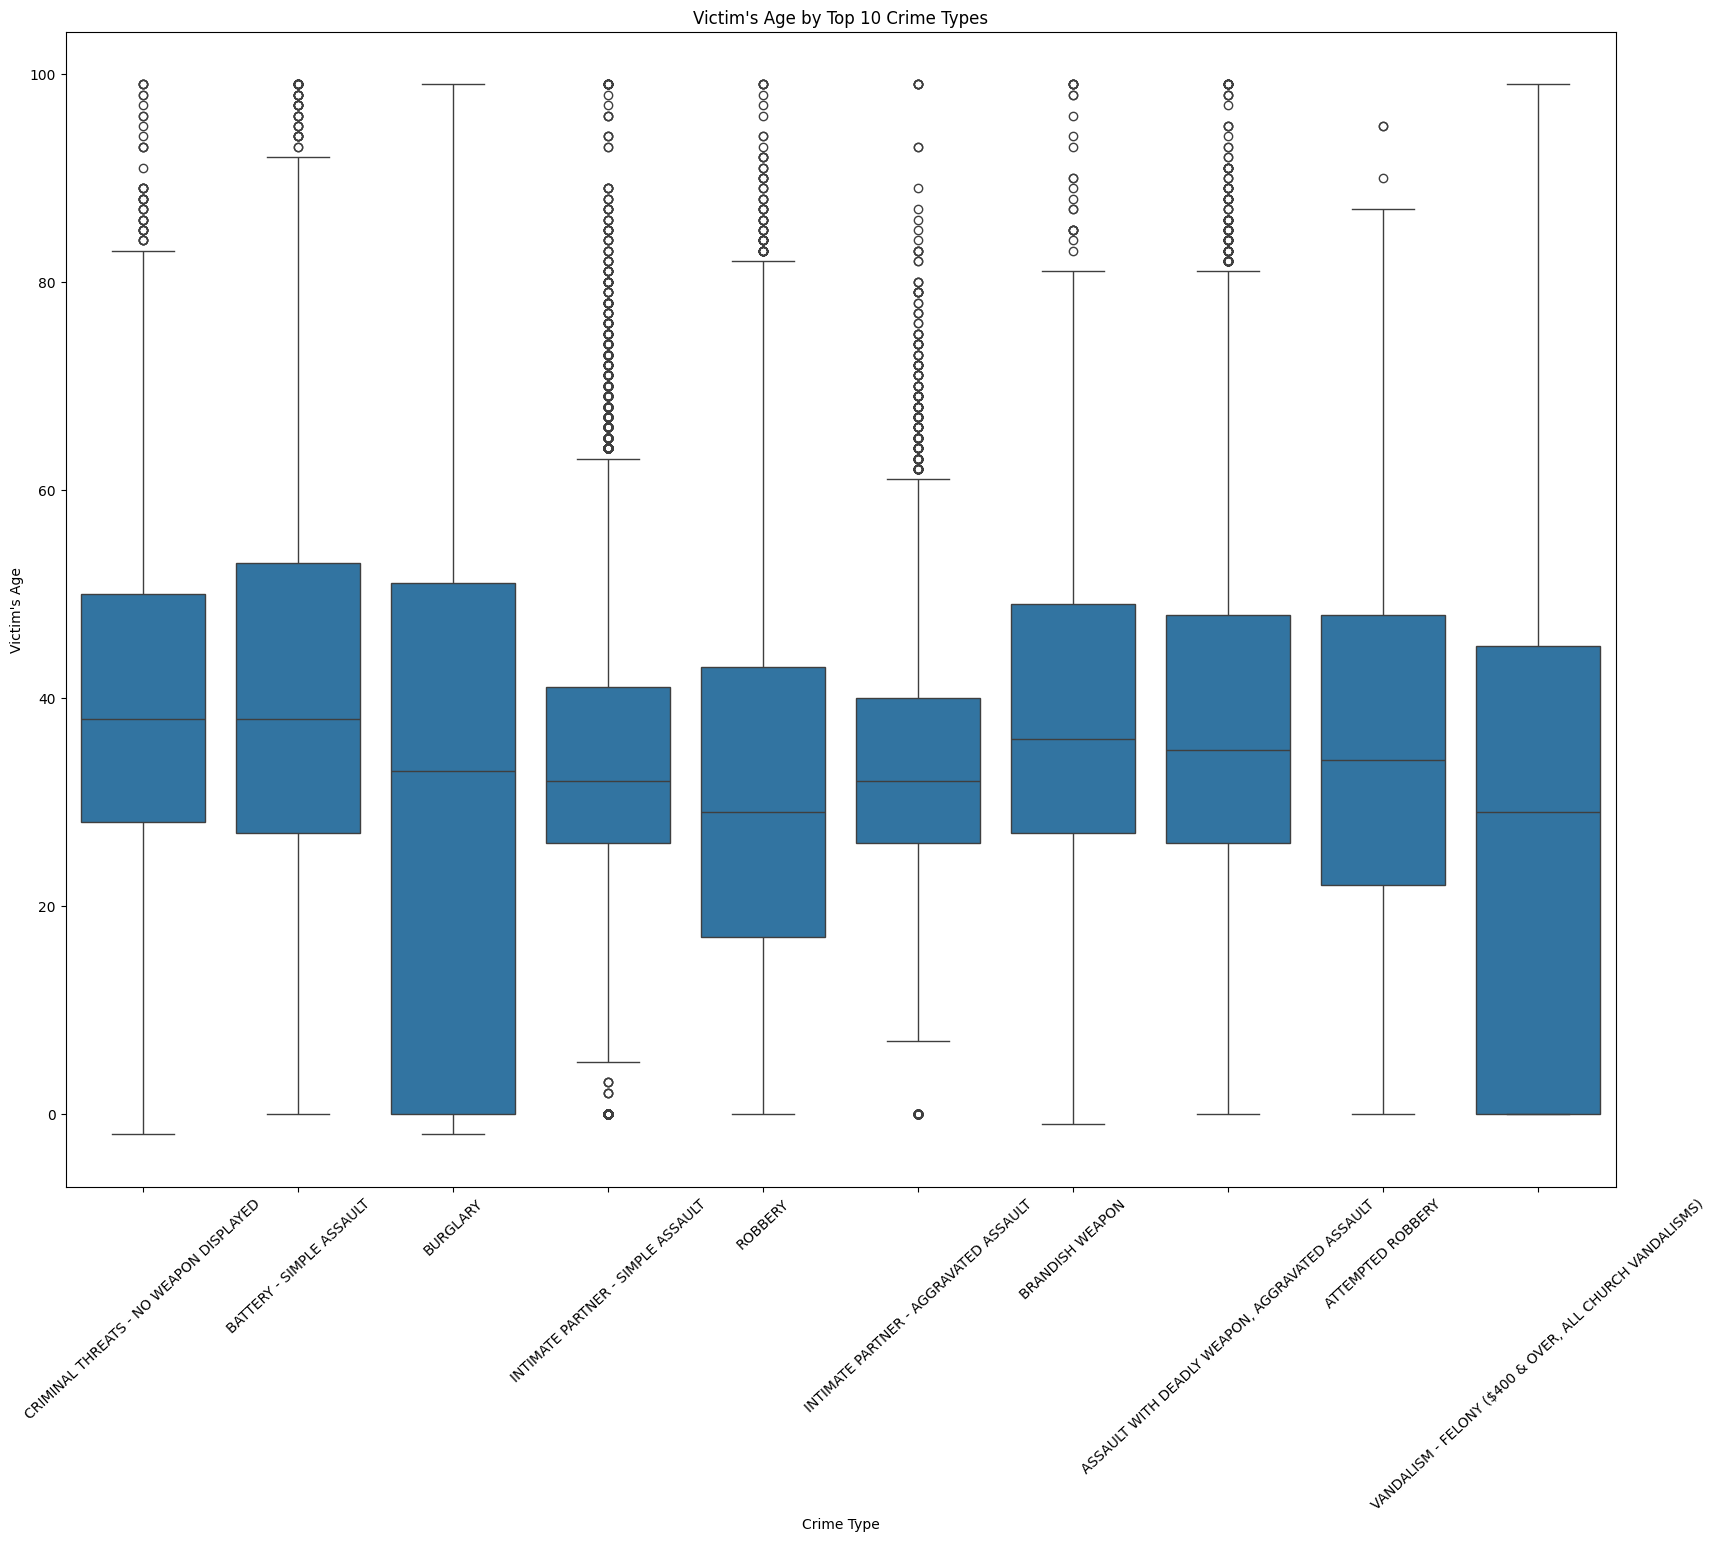

In [51]:
# Get the top 10 most frequent crime types
top_crimes = data['Crm Cd Desc'].value_counts().nlargest(10).index

# Filter the data for these top crimes
filtered_data = data[data['Crm Cd Desc'].isin(top_crimes)]

# Create the box plot
plt.figure(figsize=(20,15))
sns.boxplot(x='Crm Cd Desc', y='Vict Age', data=filtered_data)
plt.title('Victim\'s Age by Top 10 Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Victim\'s Age')
plt.xticks(rotation=403)  # Rotate x labels for better readability
plt.show()
